In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

SubhaloID_z0   FOF_z0   Snap_indep   Mass_sub_z0   Mass_FOF_z0

In [2]:
path = '../../results/subhalo_full_info_TNG50-1.dat'
data = pd.read_csv(path, delim_whitespace=True, comment='#', names=['SubhaloID_z0', 'halo_TNG50-1', 'IndependenceSnap', 'Mass_z0', 'Mass_FoF_z0'])
data.head()

/tmp/ipykernel_4376/3602833177.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, comment='#', names=['SubhaloID_z0', 'halo_TNG50-1', 'IndependenceSnap', 'Mass_z0', 'Mass_FoF_z0'])


,SubhaloID_z0,halo_TNG50-1,IndependenceSnap,Mass_z0,Mass_FoF_z0
0,0,0,-1,13289.60000,14857.54
1,1,0,-1,169.45900,14857.54
2,2,0,-1,157.06010,14857.54
3,3,0,-1,33.72688,14857.54
4,4,0,-1,18.72563,14857.54


In [3]:
data.head()

,SubhaloID_z0,halo_TNG50-1,IndependenceSnap,Mass_z0,Mass_FoF_z0
0,0,0,-1,13289.60000,14857.54
1,1,0,-1,169.45900,14857.54
2,2,0,-1,157.06010,14857.54
3,3,0,-1,33.72688,14857.54
4,4,0,-1,18.72563,14857.54


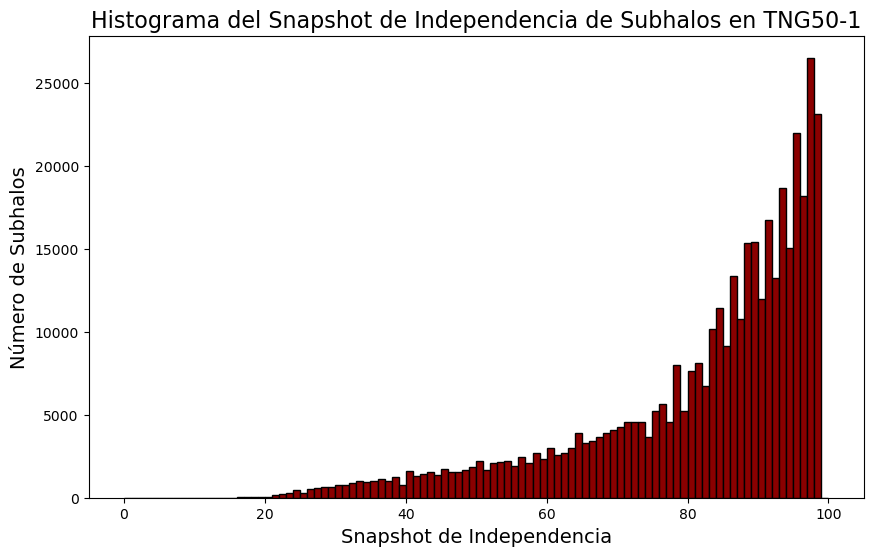

In [4]:
#histograma de el snapshot de independencia
plt.figure(figsize=(10,6))
plt.hist(data['IndependenceSnap'], bins=np.arange(0, 101, 1), color='darkred', edgecolor='black')
plt.title('Histograma del Snapshot de Independencia de Subhalos en TNG50-1', fontsize=16)
plt.xlabel('Snapshot de Independencia', fontsize=14)
plt.ylabel('Número de Subhalos', fontsize=14)

#plt.grid(alpha=0.75)
plt.show()

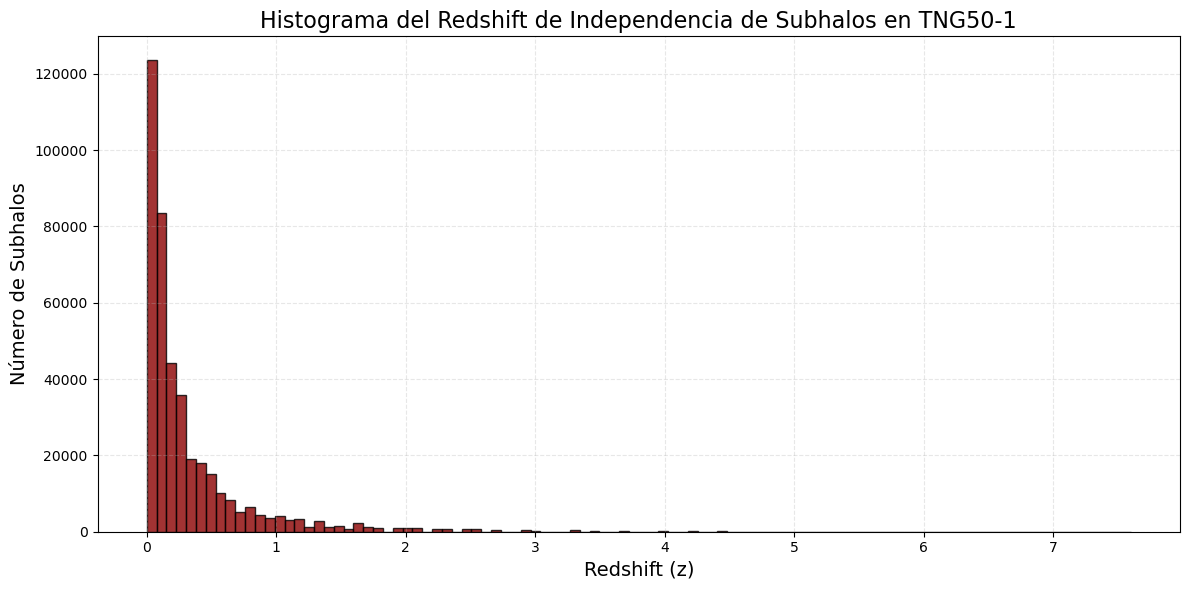

Estadísticas de redshift de independencia:
  Redshift promedio: 0.32
  Redshift mediano: 0.15
  Rango: [0.00, 7.60]


In [5]:
# Mapeo de snapshot a redshift para TNG50-1 (obtenido de https://www.tng-project.org/data/downloads/TNG50-1-Dark/)
snapshot_to_redshift = np.array([
    20.05, 14.99, 11.98, 10.98, 10.00, 9.39, 9.00, 8.45, 8.01, 7.60,  # 0-9
    7.24, 7.01, 6.49, 6.01, 5.85, 5.53, 5.23, 5.00, 4.66, 4.43,      # 10-19
    4.18, 4.01, 3.71, 3.49, 3.28, 3.01, 2.90, 2.73, 2.58, 2.44,      # 20-29
    2.32, 2.21, 2.10, 2.00, 1.90, 1.82, 1.74, 1.67, 1.60, 1.53,      # 30-39
    1.50, 1.41, 1.36, 1.30, 1.25, 1.21, 1.15, 1.11, 1.07, 1.04,      # 40-49
    1.00, 0.95, 0.92, 0.89, 0.85, 0.82, 0.79, 0.76, 0.73, 0.70,      # 50-59
    0.68, 0.64, 0.62, 0.60, 0.58, 0.55, 0.52, 0.50, 0.48, 0.46,      # 60-69
    0.44, 0.42, 0.40, 0.38, 0.36, 0.35, 0.33, 0.31, 0.30, 0.27,      # 70-79
    0.26, 0.24, 0.23, 0.21, 0.20, 0.18, 0.17, 0.15, 0.14, 0.13,      # 80-89
    0.11, 0.10, 0.08, 0.07, 0.06, 0.05, 0.03, 0.02, 0.01, 0.00       # 90-99
])

# Convertir snapshots a redshifts
data['Redshift'] = data['IndependenceSnap'].apply(lambda snap: snapshot_to_redshift[snap] if 0 <= snap < 100 else np.nan)

# Filtrar valores válidos (excluir -1, -2, etc.)
valid_data = data[data['IndependenceSnap'] >= 0]

# Histograma con redshift en el eje x
plt.figure(figsize=(12, 6))
plt.hist(valid_data['Redshift'], bins=100, color='darkred', edgecolor='black', alpha=0.8)
plt.title('Histograma del Redshift de Independencia de Subhalos en TNG50-1', fontsize=16)
plt.xlabel('Redshift (z)', fontsize=14)
plt.ylabel('Número de Subhalos', fontsize=14)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print(f"Estadísticas de redshift de independencia:")
print(f"  Redshift promedio: {valid_data['Redshift'].mean():.2f}")
print(f"  Redshift mediano: {valid_data['Redshift'].median():.2f}")
print(f"  Rango: [{valid_data['Redshift'].min():.2f}, {valid_data['Redshift'].max():.2f}]")

In [6]:
#cuantos se independizan en el snap 99
indep_snap_99 = data[data['IndependenceSnap'] == 99]
print(f"\nNúmero de subhalos que se independizan en el snapshot 99: {len(indep_snap_99)}")


Número de subhalos que se independizan en el snapshot 99: 2


In [7]:
data.describe()

,SubhaloID_z0,halo_TNG50-1,IndependenceSnap,Mass_z0,Mass_FoF_z0,Redshift
count,5.688113e+06,5.688113e+06,5.688113e+06,5.688113e+06,5.688113e+06,408895.000000
mean,2.844056e+06,2.885876e+06,4.891410e+00,3.332969e-02,3.390176e+02,0.324051
std,1.642017e+06,2.921725e+06,2.167274e+01,7.340535e+00,1.756457e+03,0.475078
min,0.000000e+00,0.000000e+00,-2.000000e+00,7.095264e-05,6.705445e-04,0.000000
25%,1.422028e+06,2.900770e+05,-1.000000e+00,1.106524e-03,1.423204e-03,0.060000
50%,2.844056e+06,1.923342e+06,-1.000000e+00,1.751996e-03,2.950730e-03,0.150000
75%,4.266084e+06,4.806349e+06,-1.000000e+00,3.934307e-03,2.039716e-02,0.380000
max,5.688112e+06,1.024701e+07,9.900000e+01,1.328960e+04,1.485754e+04,7.600000


In [8]:
#Ver cuantos subhalos tienen IndependenceSnap = -2 nunca fue halo central
never_central = data[data['IndependenceSnap'] == -2]
print(f"\nNúmero de subhalos que nunca fueron halo central (IndependenceSnap = -2): {len(never_central)}")


Número de subhalos que nunca fueron halo central (IndependenceSnap = -2): 48353


In [9]:
#ver cuantos subhalos tienen IndependenceSnap = -1
never_independent = data[data['IndependenceSnap'] == -1]
print(f"\nNúmero de subhalos fuera del rango de masas (IndependenceSnap = -1): {len(never_independent)}")


Número de subhalos fuera del rango de masas (IndependenceSnap = -1): 5230865


In [10]:
#Ver los datos de esos subhalos
never_central

,SubhaloID_z0,halo_TNG50-1,IndependenceSnap,Mass_z0,Mass_FoF_z0,Redshift
76,76,0,-2,0.531409,14857.5400,NaN
100,100,0,-2,0.366017,14857.5400,NaN
108,108,0,-2,0.319503,14857.5400,NaN
120,120,0,-2,0.302009,14857.5400,NaN
121,121,0,-2,0.271019,14857.5400,NaN
...,...,...,...,...,...,...
524923,524923,188,-2,0.000830,111.5563,NaN
524928,524928,188,-2,0.000799,111.5563,NaN
524944,524944,188,-2,0.000768,111.5563,NaN
524947,524947,188,-2,0.000768,111.5563,NaN


In [11]:
path = "../../results/disco2.npy"
matches = np.load(path, allow_pickle=True)

# Convertir a DataFrame
df = pd.DataFrame(list(matches))    

In [12]:
path = "../../results/no_disco2.npy"
matches2 = np.load(path, allow_pickle=True)

# Convertir a DataFrame
df2 = pd.DataFrame(list(matches2))

In [13]:
df.head()

,subhalo_TNG50-1,halo_TNG50-1,Mvir_TNG50-1,halo_TNG50-2,Mvir_TNG50-2,dist,cost
0,117251,3,3470.526367,3,3474.905273,22.51403,0.03397
1,117254,3,3470.526367,3,3474.905273,22.51403,0.03397
2,117255,3,3470.526367,3,3474.905273,22.51403,0.03397
3,117256,3,3470.526367,3,3474.905273,22.51403,0.03397
4,117257,3,3470.526367,3,3474.905273,22.51403,0.03397


In [14]:
len(df2[(df2['Mvir_TNG50-1']>=df['Mvir_TNG50-1'].min())&(df2['Mvir_TNG50-1']<=df['Mvir_TNG50-1'].max())]['halo_TNG50-1'].unique())

168

In [15]:
# conservar solo halo_TNG50-1 y Mvir_TNG50-1
halos_tng50_1_df = df[['halo_TNG50-1', 'Mvir_TNG50-1']].copy()


In [16]:
# convertir tipos y eliminar duplicados por halo (si corresponde)
halos_tng50_1_df['halo_TNG50-1'] = halos_tng50_1_df['halo_TNG50-1'].astype(int)
halos_tng50_1_df['Mvir_TNG50-1'] = halos_tng50_1_df['Mvir_TNG50-1'].astype(float)


halos_tng50_1_df = halos_tng50_1_df.drop_duplicates(subset='halo_TNG50-1', keep='first').reset_index(drop=True)

# mostrar resumen
print(f"Filas: {len(halos_tng50_1_df)}")
halos_tng50_1_df.head()

Filas: 108


,halo_TNG50-1,Mvir_TNG50-1
0,3,3470.526367
1,0,15167.142578
2,4,3142.989746
3,5,1859.250610
4,6,3027.909180


In [17]:
df2.head()

,subhalo_TNG50-1,halo_TNG50-1,Mvir_TNG50-1,halo_TNG50-2,Mvir_TNG50-2,dist,cost
0,0,0,15167.142578,0.0,15095.435547,22.914078,0.021655
1,1,0,15167.142578,0.0,15095.435547,22.914078,0.021655
2,2,0,15167.142578,0.0,15095.435547,22.914078,0.021655
3,3,0,15167.142578,0.0,15095.435547,22.914078,0.021655
4,4,0,15167.142578,0.0,15095.435547,22.914078,0.021655


In [18]:
# conservar solo halo_TNG50-1 y Mvir_TNG50-1
halos_tng50_1_df2 = df2[['halo_TNG50-1', 'Mvir_TNG50-1']].copy()

# eliminar filas sin halo o sin Mvir
halos_tng50_1_df2 = halos_tng50_1_df2[halos_tng50_1_df2['halo_TNG50-1'].notnull()]
halos_tng50_1_df2 = halos_tng50_1_df2[halos_tng50_1_df2['Mvir_TNG50-1'].notnull()].reset_index(drop=True)

# convertir tipos y eliminar duplicados por halo (si corresponde)
halos_tng50_1_df2['halo_TNG50-1'] = halos_tng50_1_df2['halo_TNG50-1'].astype(int)
halos_tng50_1_df2['Mvir_TNG50-1'] = halos_tng50_1_df2['Mvir_TNG50-1'].astype(float)
halos_tng50_1_df2 = halos_tng50_1_df2.drop_duplicates(subset='halo_TNG50-1', keep='first').reset_index(drop=True)

# mostrar resumen
print(f"Filas: {len(halos_tng50_1_df2)}")
halos_tng50_1_df2.head()

Filas: 4462345


,halo_TNG50-1,Mvir_TNG50-1
0,0,15167.142578
1,1,7466.339355
2,2,5243.999512
3,3,3470.526367
4,4,3142.989746


In [19]:
len(halos_tng50_1_df2[(halos_tng50_1_df2['Mvir_TNG50-1']>=df['Mvir_TNG50-1'].min())&(halos_tng50_1_df2['Mvir_TNG50-1']<=df['Mvir_TNG50-1'].max())]['halo_TNG50-1'].unique())

168

In [20]:
#combinar ambos dataframes para tener todos los halos con y sin disco
combined_df = pd.concat([halos_tng50_1_df, halos_tng50_1_df2], ignore_index=True).drop_duplicates(subset='halo_TNG50-1', keep='first').reset_index(drop=True)


print(f"Número de halos en común entre discos y no discos: {len(combined_df)}")
combined_df.head()

Número de halos en común entre discos y no discos: 4462345


,halo_TNG50-1,Mvir_TNG50-1
0,3,3470.526367
1,0,15167.142578
2,4,3142.989746
3,5,1859.250610
4,6,3027.909180


In [21]:
len(combined_df[(combined_df['Mvir_TNG50-1']>=df['Mvir_TNG50-1'].min())&(combined_df['Mvir_TNG50-1']<=df['Mvir_TNG50-1'].max())]['halo_TNG50-1'].unique())

168

In [22]:
DF = pd.merge(data, combined_df, 'outer', on='halo_TNG50-1')
DF.head()

,SubhaloID_z0,halo_TNG50-1,IndependenceSnap,Mass_z0,Mass_FoF_z0,Redshift,Mvir_TNG50-1
0,0,0,-1,13289.60000,14857.54,NaN,15167.142578
1,1,0,-1,169.45900,14857.54,NaN,15167.142578
2,2,0,-1,157.06010,14857.54,NaN,15167.142578
3,3,0,-1,33.72688,14857.54,NaN,15167.142578
4,4,0,-1,18.72563,14857.54,NaN,15167.142578


In [23]:
#Filtrar por Mvir_TNG50-1 > 107.5 y < 15167.2
DF = DF[(DF['Mvir_TNG50-1'] >= df['Mvir_TNG50-1'].min()) & (DF['Mvir_TNG50-1'] <= df['Mvir_TNG50-1'].max())]

In [24]:
DF.sort_values('IndependenceSnap', inplace=True)
DF.head()

,SubhaloID_z0,halo_TNG50-1,IndependenceSnap,Mass_z0,Mass_FoF_z0,Redshift,Mvir_TNG50-1
450585,450585,85,-2,0.000953,215.4222,NaN,127.916367
450596,450596,85,-2,0.000953,215.4222,NaN,127.916367
450599,450599,85,-2,0.000953,215.4222,NaN,127.916367
450604,450604,85,-2,0.000922,215.4222,NaN,127.916367
48212,48212,0,-2,0.000922,14857.5400,NaN,15167.142578


In [25]:
#cuantos con independence -2
never_central_DF = DF[DF['IndependenceSnap'] == -2]
print(f"\nNúmero de subhalos que nunca fueron halo central (IndependenceSnap = -2) en el DataFrame combinado: {len(never_central_DF)}")


Número de subhalos que nunca fueron halo central (IndependenceSnap = -2) en el DataFrame combinado: 48182


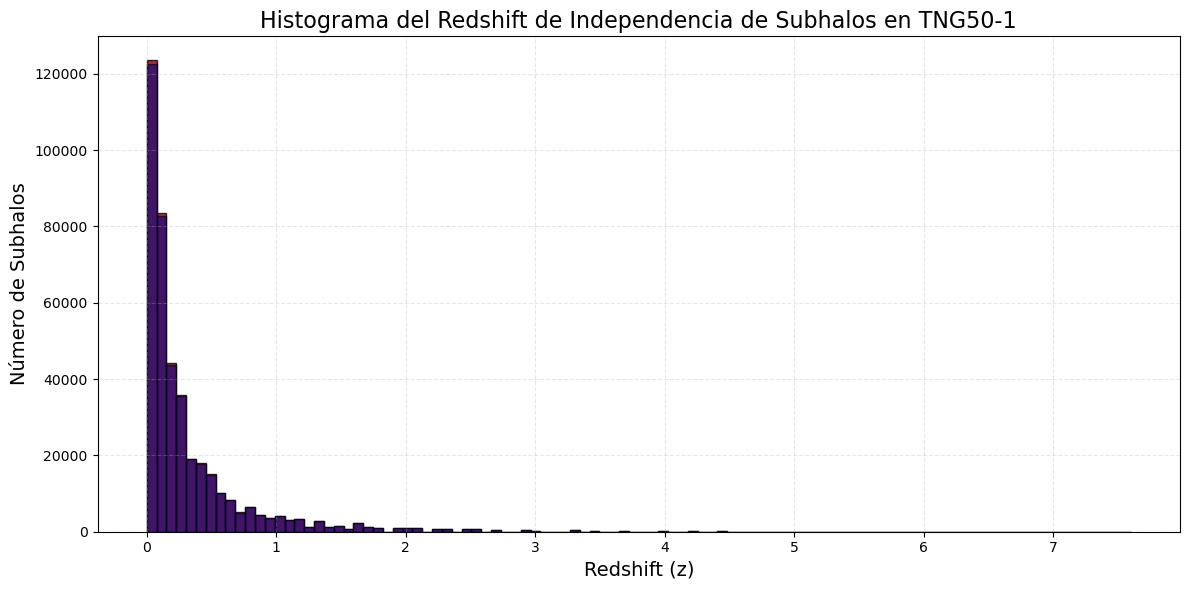

In [26]:
# Filtrar valores válidos (excluir -1, -2, etc.)
valid_DF = DF[DF['IndependenceSnap'] >= 0]

# Histograma con redshift en el eje x
plt.figure(figsize=(12, 6))
plt.hist(valid_data['Redshift'],bins=100, color='darkred', edgecolor='black', alpha=0.8) 
plt.hist(valid_DF['Redshift'], bins=100, color='darkblue', edgecolor='black', alpha=0.6)
plt.title('Histograma del Redshift de Independencia de Subhalos en TNG50-1', fontsize=16)
plt.xlabel('Redshift (z)', fontsize=14)
plt.ylabel('Número de Subhalos', fontsize=14)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

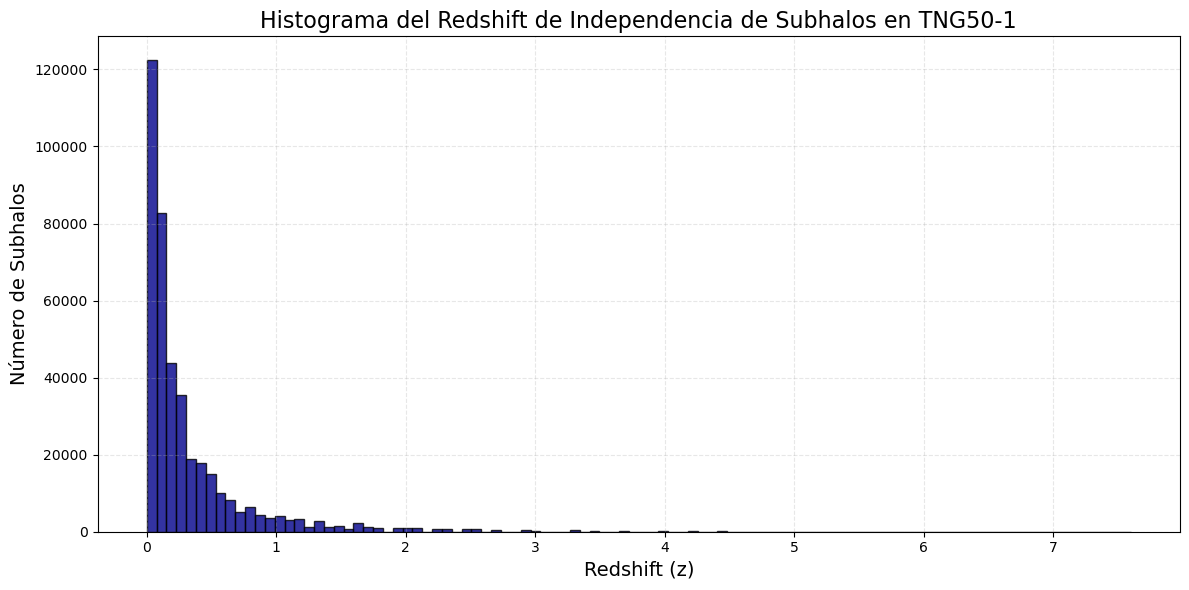

In [27]:
# Histograma con redshift en el eje x
plt.figure(figsize=(12, 6))
plt.hist(valid_DF['Redshift'], bins=100, color='darkblue', edgecolor='black', alpha=0.8)
plt.title('Histograma del Redshift de Independencia de Subhalos en TNG50-1', fontsize=16)
plt.xlabel('Redshift (z)', fontsize=14)
plt.ylabel('Número de Subhalos', fontsize=14)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [28]:
print(f"Estadísticas de redshift de independencia:")
print(f"  Redshift promedio: {valid_DF['Redshift'].mean():.2f}")
print(f"  Redshift mediano: {valid_DF['Redshift'].median():.2f}")
print(f"  Rango: [{valid_DF['Redshift'].min():.2f}, {valid_DF['Redshift'].max():.2f}]")

Estadísticas de redshift de independencia:
  Redshift promedio: 0.32
  Redshift mediano: 0.15
  Rango: [0.00, 7.60]


In [29]:
#Cuantos halos distintos hay en el DF combinado
print(f"\nNúmero de halos distintos en el DataFrame combinado: {valid_DF['halo_TNG50-1'].nunique()}")


Número de halos distintos en el DataFrame combinado: 162


In [30]:
#cuantos subhalos hay en el DF combinado
print(f"Número total de subhalos en el DataFrame combinado: {len(DF)}")

Número total de subhalos en el DataFrame combinado: 512847


In [31]:
DF.head()

,SubhaloID_z0,halo_TNG50-1,IndependenceSnap,Mass_z0,Mass_FoF_z0,Redshift,Mvir_TNG50-1
450585,450585,85,-2,0.000953,215.4222,NaN,127.916367
450596,450596,85,-2,0.000953,215.4222,NaN,127.916367
450599,450599,85,-2,0.000953,215.4222,NaN,127.916367
450604,450604,85,-2,0.000922,215.4222,NaN,127.916367
48212,48212,0,-2,0.000922,14857.5400,NaN,15167.142578


In [32]:
sub_discos = pd.read_csv('halos.txt', names=['SubhaloID_z0'])
print(len(sub_discos))
sub_discos.head() 

377


,SubhaloID_z0
0,117251
1,117254
2,117255
3,117256
4,117257


In [33]:
DF.head()

,SubhaloID_z0,halo_TNG50-1,IndependenceSnap,Mass_z0,Mass_FoF_z0,Redshift,Mvir_TNG50-1
450585,450585,85,-2,0.000953,215.4222,NaN,127.916367
450596,450596,85,-2,0.000953,215.4222,NaN,127.916367
450599,450599,85,-2,0.000953,215.4222,NaN,127.916367
450604,450604,85,-2,0.000922,215.4222,NaN,127.916367
48212,48212,0,-2,0.000922,14857.5400,NaN,15167.142578


In [34]:
#si SubhaloID_z0 está en sub_discos entonces es disco, sino no disco
DF['has_disk'] = DF['SubhaloID_z0'].isin(sub_discos['SubhaloID_z0'])
DF.head()

,SubhaloID_z0,halo_TNG50-1,IndependenceSnap,Mass_z0,Mass_FoF_z0,Redshift,Mvir_TNG50-1,has_disk
450585,450585,85,-2,0.000953,215.4222,NaN,127.916367,False
450596,450596,85,-2,0.000953,215.4222,NaN,127.916367,False
450599,450599,85,-2,0.000953,215.4222,NaN,127.916367,False
450604,450604,85,-2,0.000922,215.4222,NaN,127.916367,False
48212,48212,0,-2,0.000922,14857.5400,NaN,15167.142578,False


In [35]:
#Cuantos con disco nunca se independizaron
print(f"Número de subhalos con disco que nunca se independizaron: {len(DF[(DF['has_disk']) & (DF['IndependenceSnap'] == -2)])}")

Número de subhalos con disco que nunca se independizaron: 0


In [36]:
sub_disk_df = DF[DF['has_disk']]
sub_no_disk_df = DF[~DF['has_disk']]

In [37]:
len(sub_no_disk_df)

512470

In [38]:
sub_disk_df.describe()

,SubhaloID_z0,halo_TNG50-1,IndependenceSnap,Mass_z0,Mass_FoF_z0,Redshift,Mvir_TNG50-1
count,377.000000,377.000000,377.000000,377.000000,377.000000,185.000000,377.000000
mean,322509.525199,39.976127,39.774536,87.254100,1726.465255,0.249622,1604.323111
std,126998.711397,32.105162,42.385134,146.483352,2627.100092,0.204050,2593.840802
min,8.000000,0.000000,-1.000000,1.466765,162.195700,0.000000,107.666786
25%,229937.000000,10.000000,-1.000000,7.074981,264.000500,0.080000,239.157501
50%,362998.000000,33.000000,-1.000000,19.192720,503.557800,0.180000,513.470825
75%,428177.000000,67.000000,84.000000,127.226000,2277.744000,0.380000,2301.364258
max,472548.000000,107.000000,99.000000,1013.933000,14857.540000,0.890000,15167.142578


In [39]:
sub_no_disk_df.describe()

,SubhaloID_z0,halo_TNG50-1,IndependenceSnap,Mass_z0,Mass_FoF_z0,Redshift,Mvir_TNG50-1
count,512470.000000,512470.000000,512470.000000,512470.000000,512470.000000,404576.000000,512470.000000
mean,256538.477688,30.156294,63.707156,0.134762,3745.030635,0.323864,3638.513895
std,148328.923984,40.587799,36.791717,23.969918,4635.245433,0.475145,4749.233493
min,0.000000,0.000000,-2.000000,0.000071,101.943900,0.000000,107.666786
25%,128161.250000,3.000000,44.000000,0.000953,386.204300,0.060000,380.309296
50%,256342.500000,12.000000,81.000000,0.001691,2078.828000,0.150000,1859.250610
75%,384568.750000,42.000000,92.000000,0.004088,4625.531000,0.380000,3470.526367
max,525001.000000,188.000000,99.000000,13289.600000,14857.540000,7.600000,15167.142578


In [40]:
sub_no_disk_df = sub_no_disk_df[(sub_no_disk_df['Mass_z0']>=sub_disk_df['Mass_z0'].min()) & (sub_no_disk_df['Mass_z0']<=sub_disk_df['Mass_z0'].max())]

In [41]:
sub_disk_df['Mass_z0'].min(), sub_disk_df['Mass_z0'].max()

(np.float64(1.466765), np.float64(1013.933))

In [42]:
len(sub_no_disk_df)

792

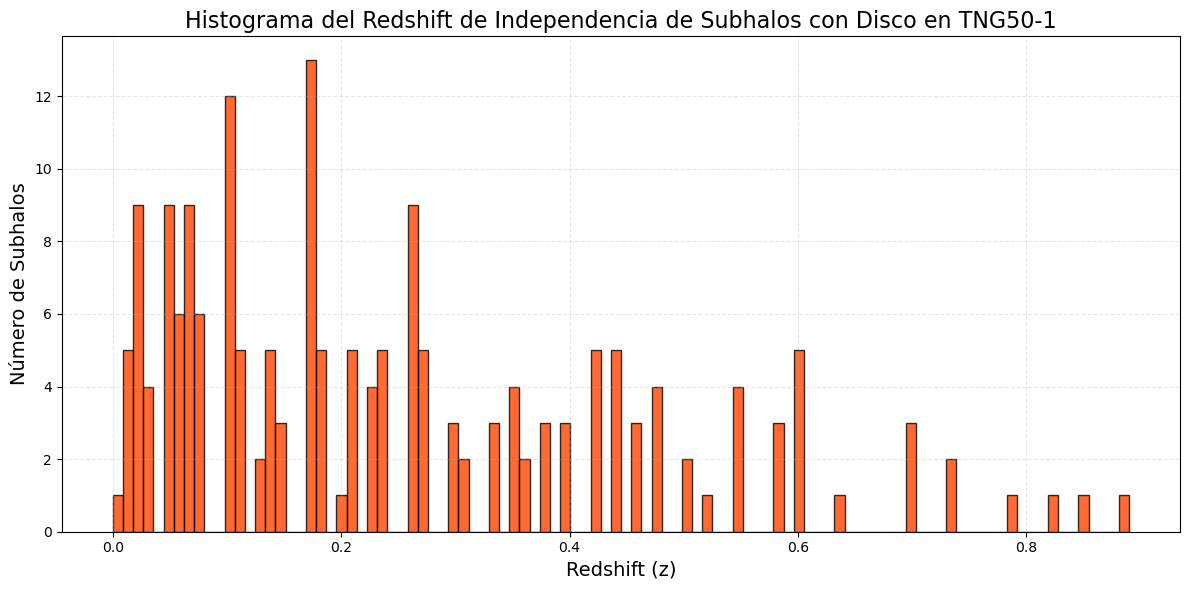

In [43]:
plt.figure(figsize=(12, 6))
plt.hist(sub_disk_df['Redshift'], bins=100, color='orangered', edgecolor='black', alpha=0.8, label='Con Disco')
plt.ylabel('Número de Subhalos', fontsize=14)
plt.xlabel('Redshift (z)', fontsize=14)
plt.title('Histograma del Redshift de Independencia de Subhalos con Disco en TNG50-1', fontsize=16)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

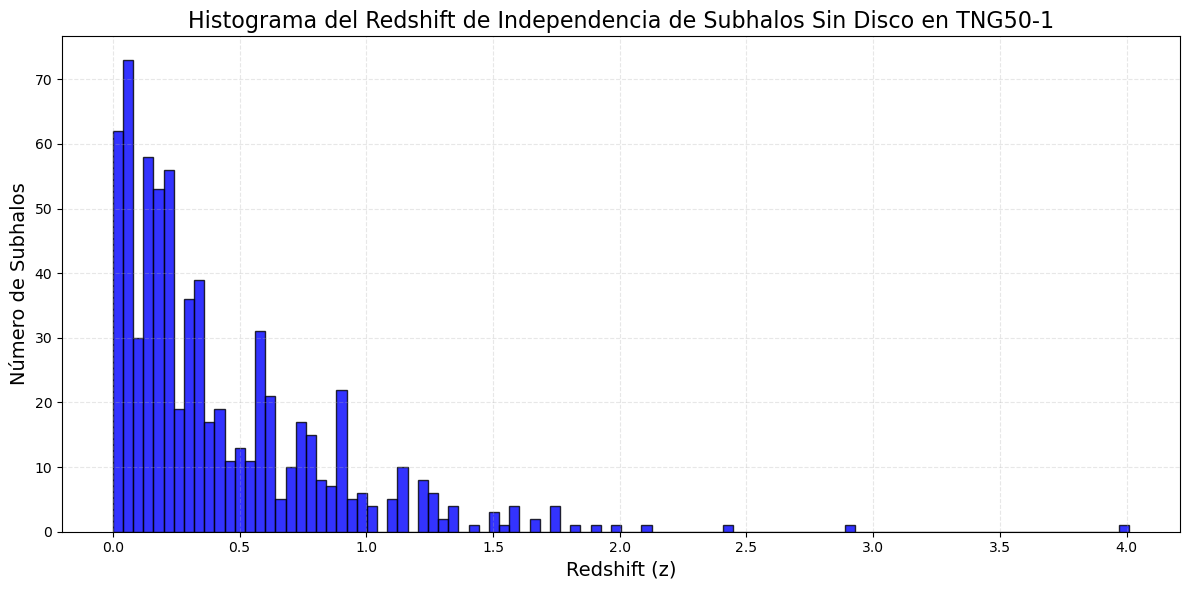

In [44]:
plt.figure(figsize=(12, 6))
plt.hist(sub_no_disk_df['Redshift'], bins=100, color='blue', edgecolor='black', alpha=0.8, label='Sin Disco')
plt.ylabel('Número de Subhalos', fontsize=14)
plt.xlabel('Redshift (z)', fontsize=14)
plt.title('Histograma del Redshift de Independencia de Subhalos Sin Disco en TNG50-1', fontsize=16)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [45]:
#cuantos subhalos sin disco nunca se independizaron
never_central_no_disk = sub_no_disk_df[sub_no_disk_df['IndependenceSnap'] == -2]
print(f"\nNúmero de subhalos sin disco que nunca fueron halo central (IndependenceSnap = -2): {len(never_central_no_disk)}")


Número de subhalos sin disco que nunca fueron halo central (IndependenceSnap = -2): 1


In [46]:
#rango de Mass_z0 en sub_disk_df
print(f"\nRango de Mass_z0 en sub_disk_df: [{sub_disk_df['Mass_z0'].min()}, {sub_disk_df['Mass_z0'].max()}]")


Rango de Mass_z0 en sub_disk_df: [1.466765, 1013.933]


In [47]:
len(sub_disk_df)

377

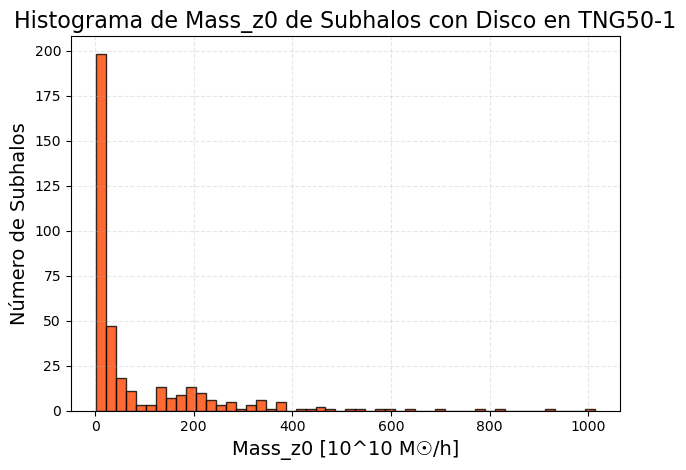

In [48]:
plt.hist(sub_disk_df['Mass_z0'], bins=50, color='orangered', edgecolor='black', alpha=0.8)
plt.title('Histograma de Mass_z0 de Subhalos con Disco en TNG50-1', fontsize=16)
plt.xlabel('Mass_z0 [10^10 M☉/h]', fontsize=14)
plt.ylabel('Número de Subhalos', fontsize=14)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

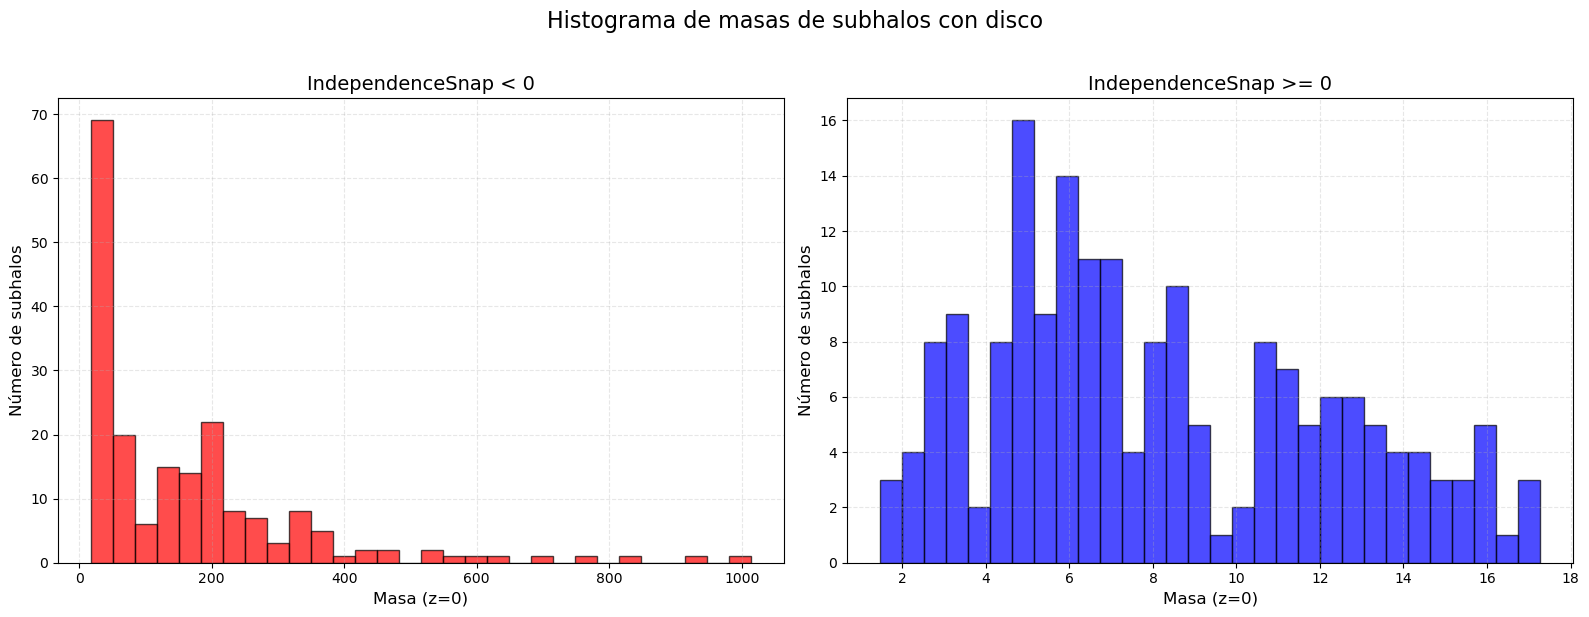

In [49]:
#hitograma de masas de los subhalos con disco separado por colores azul lo que tengan IndependenceSnap >=0 y rojo los que tengan IndependenceSnap <0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: IndependenceSnap < 0
ax1.hist(sub_disk_df[sub_disk_df['IndependenceSnap'] < 0]['Mass_z0'], bins=30, color='red', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Masa (z=0)', fontsize=12)
ax1.set_ylabel('Número de subhalos', fontsize=12)
ax1.set_title('IndependenceSnap < 0', fontsize=14)
ax1.grid(alpha=0.3, linestyle='--')

# Subplot 2: IndependenceSnap >= 0
ax2.hist(sub_disk_df[sub_disk_df['IndependenceSnap'] >= 0]['Mass_z0'], bins=30, color='blue', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Masa (z=0)', fontsize=12)
ax2.set_ylabel('Número de subhalos', fontsize=12)
ax2.set_title('IndependenceSnap >= 0', fontsize=14)
ax2.grid(alpha=0.3, linestyle='--')

plt.suptitle('Histograma de masas de subhalos con disco', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [50]:
len(sub_disk_df)

377

In [51]:
sub_disk_df[sub_disk_df['IndependenceSnap']==-2]

,SubhaloID_z0,halo_TNG50-1,IndependenceSnap,Mass_z0,Mass_FoF_z0,Redshift,Mvir_TNG50-1,has_disk


In [52]:
halos_rebeldes = sub_disk_df[sub_disk_df['IndependenceSnap']==-2]
halos_normales = sub_disk_df[sub_disk_df['IndependenceSnap']>0]

In [53]:
halos_rebeldes[halos_rebeldes['Mass_z0']==halos_rebeldes['Mass_z0'].max()]

,SubhaloID_z0,halo_TNG50-1,IndependenceSnap,Mass_z0,Mass_FoF_z0,Redshift,Mvir_TNG50-1,has_disk


In [54]:
sub_disk_df[sub_disk_df['IndependenceSnap']==-2].describe()

,SubhaloID_z0,halo_TNG50-1,IndependenceSnap,Mass_z0,Mass_FoF_z0,Redshift,Mvir_TNG50-1
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Mass_z0')

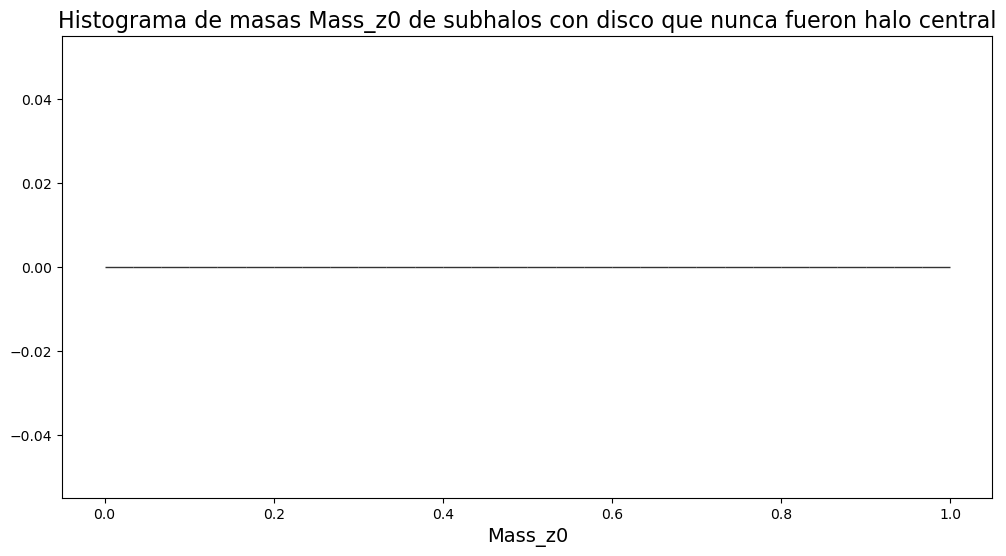

In [55]:
#histogramas de masas Mass_z0
plt.figure(figsize=(12, 6))
plt.hist(halos_rebeldes['Mass_z0'], bins=30, color='purple', edgecolor='black', alpha=0.8)

plt.title('Histograma de masas Mass_z0 de subhalos con disco que nunca fueron halo central', fontsize=16)
plt.xlabel('Mass_z0', fontsize=14)

## Muestreo Aleatorio Uniforme

Muestreo simple: seleccionar aleatoriamente subhalos sin disco para igualar el número de subhalos con disco

In [56]:
# Muestreo aleatorio uniforme simple
n_disk = len(sub_disk_df)
n_no_disk = len(sub_no_disk_df)

print(f"Subhalos con disco: {n_disk}")
print(f"Subhalos sin disco (disponibles): {n_no_disk}")
print(f"\nMuestreando {n_disk} subhalos sin disco aleatoriamente...")

# Muestreo aleatorio con semilla para reproducibilidad
sub_no_disk_df_sampled = sub_no_disk_df.sample(n=n_disk, random_state=42).reset_index(drop=True)

print(f"✓ Muestra creada: {len(sub_no_disk_df_sampled)} subhalos sin disco")

Subhalos con disco: 377
Subhalos sin disco (disponibles): 792

Muestreando 377 subhalos sin disco aleatoriamente...
✓ Muestra creada: 377 subhalos sin disco


In [57]:
sub_disk_df['Mass_z0'].min(), sub_disk_df['Mass_z0'].max()

(np.float64(1.466765), np.float64(1013.933))

In [58]:
sub_no_disk_df_sampled

,SubhaloID_z0,halo_TNG50-1,IndependenceSnap,Mass_z0,Mass_FoF_z0,Redshift,Mvir_TNG50-1,has_disk
0,57,0,93,4.990088,14857.5400,0.07,15167.142578,False
1,117312,3,84,2.069130,4625.5310,0.20,3470.526367,False
2,153,0,88,1.502250,14857.5400,0.14,15167.142578,False
3,117282,3,89,5.274940,4625.5310,0.13,3470.526367,False
4,31,0,44,4.025313,14857.5400,1.25,15167.142578,False
...,...,...,...,...,...,...,...,...
372,208823,8,89,4.847452,2354.6250,0.13,2301.364258,False
373,220605,9,44,1.687106,2277.7440,1.25,2472.336182,False
374,14,0,59,12.121580,14857.5400,0.70,15167.142578,False
375,465257,99,97,4.249475,218.6145,0.02,200.465546,False


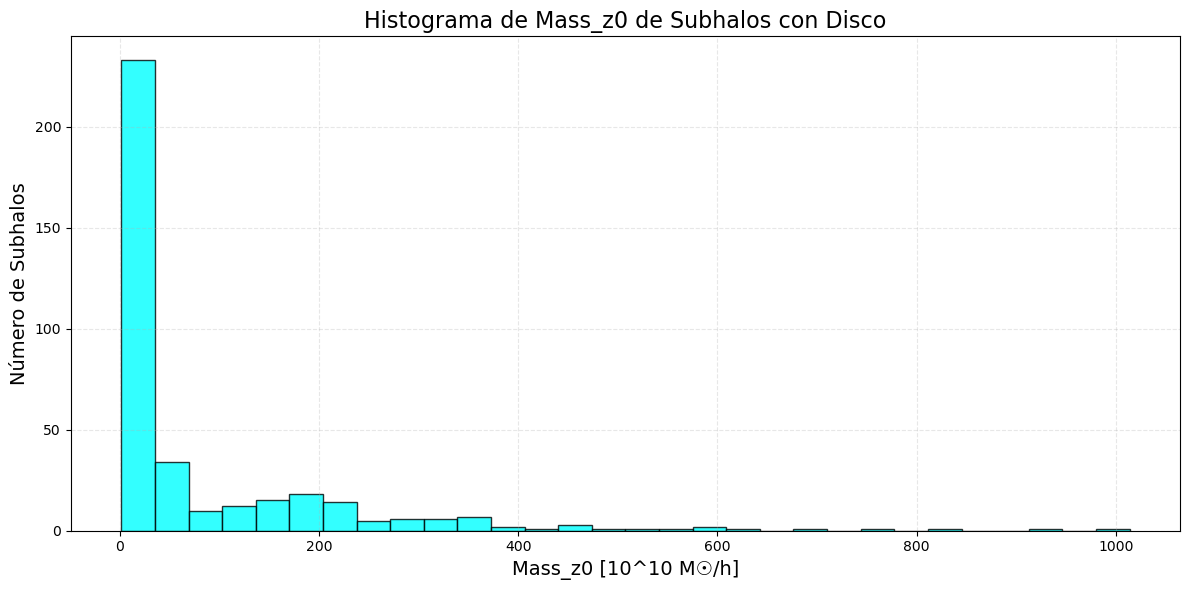

In [59]:
plt.figure(figsize=(12, 6))
plt.hist(sub_disk_df['Mass_z0'], bins=30, color='cyan', edgecolor='black', alpha=0.8)
plt.title('Histograma de Mass_z0 de Subhalos con Disco', fontsize=16)
plt.xlabel('Mass_z0 [10^10 M☉/h]', fontsize=14)
plt.ylabel('Número de Subhalos', fontsize=14)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

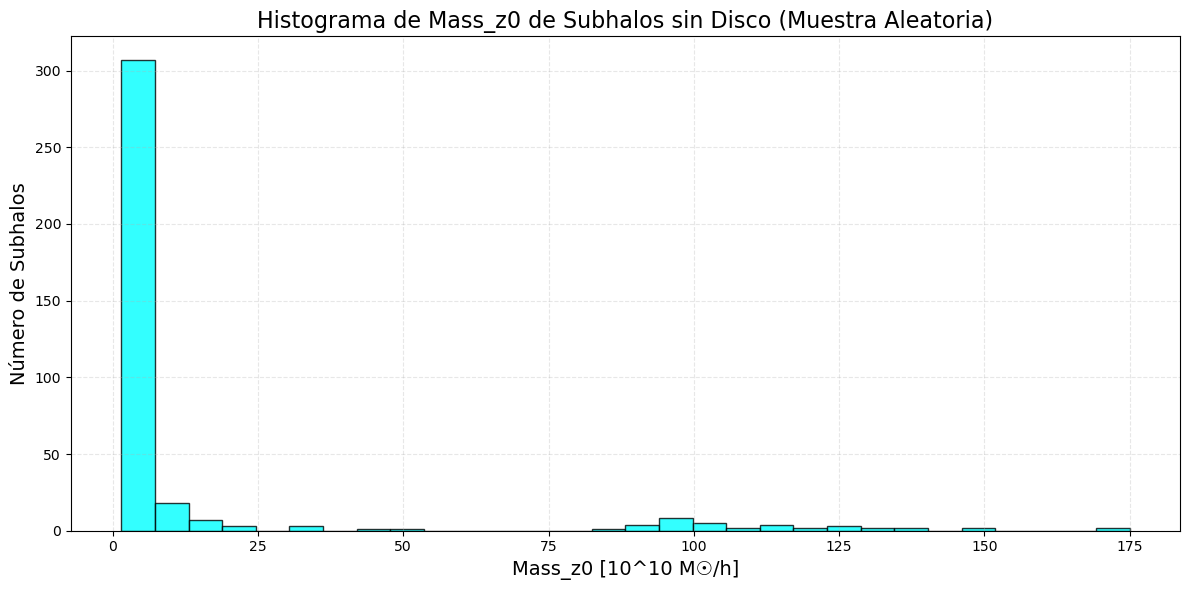

In [60]:
plt.figure(figsize=(12, 6))
plt.hist(sub_no_disk_df_sampled['Mass_z0'], bins=30, color='cyan', edgecolor='black', alpha=0.8)
plt.title('Histograma de Mass_z0 de Subhalos sin Disco (Muestra Aleatoria)', fontsize=16)
plt.xlabel('Mass_z0 [10^10 M☉/h]', fontsize=14)
plt.ylabel('Número de Subhalos', fontsize=14)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [61]:
# Guardar los IDs de los subhalos sin disco muestreados en un archivo txt
sub_no_disk_df_sampled['SubhaloID_z0'].to_csv('halos_nodisk.txt', index=False, header=False)

print(f"Archivo 'halos_nodisk.txt' guardado con {len(sub_no_disk_df_sampled)} IDs.")

Archivo 'halos_nodisk.txt' guardado con 377 IDs.
